In [1]:
import pandas as pd

In [9]:
df=pd.read_csv("D:/IPSR/PYCARAT/fraud detection/creditcard.csv")

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.shape

(284807, 31)

In [13]:
len(df[df['Class']==0])

284315

In [14]:
len(df[df['Class']==1])

492

In [15]:
from pycaret.classification import*
clf=setup(data=df,target='Class')

Setup Succesfully Completed!


,Description,Value
0,session_id,3370
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(284807, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [17]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9995,0.9585,0.7675,0.9357,0.8414,0.8412,0.8463,8.7307
1,Extreme Gradient Boosting,0.9995,0.9776,0.7717,0.9303,0.8402,0.8400,0.8453,40.8410
2,CatBoost Classifier,0.9995,0.9760,0.7883,0.9427,0.8570,0.8568,0.8610,129.1243
3,Random Forest Classifier,0.9994,0.9291,0.7467,0.9159,0.8206,0.8204,0.8257,7.3201
4,Linear Discriminant Analysis,0.9994,0.9817,0.7675,0.8471,0.8032,0.8028,0.8049,0.9564
5,Decision Tree Classifier,0.9992,0.8774,0.7552,0.7860,0.7689,0.7685,0.7694,16.5737
6,Ada Boost Classifier,0.9992,0.9707,0.6887,0.8202,0.7439,0.7435,0.7487,66.4660
7,Gradient Boosting Classifier,0.9991,0.7301,0.6180,0.8227,0.6928,0.6924,0.7058,407.3019
8,Logistic Regression,0.9988,0.9030,0.6013,0.7016,0.6440,0.6434,0.6471,3.5234
9,Ridge Classifier,0.9988,0.0000,0.4107,0.8014,0.5341,0.5336,0.5679,0.2593


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3370, verbose=0,
                     warm_start=False)

In [24]:
catboost=create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9998,0.9804,0.8750,1.0000,0.9333,0.9332,0.9353
1,0.9997,0.9827,0.8750,0.9545,0.9130,0.9129,0.9138
2,0.9996,0.9934,0.8333,0.9524,0.8889,0.8887,0.8907
3,0.9996,0.9921,0.8000,0.9524,0.8696,0.8694,0.8727
4,0.9994,0.9908,0.7083,0.9444,0.8095,0.8092,0.8177
5,0.9995,0.9879,0.7500,0.9474,0.8372,0.8370,0.8427
6,0.9994,0.9868,0.8333,0.8333,0.8333,0.8330,0.8330
7,0.9995,0.9622,0.7500,0.9474,0.8372,0.8370,0.8427
8,0.9996,0.9468,0.7500,1.0000,0.8571,0.8569,0.8658
9,0.9994,0.9374,0.7083,0.8947,0.7907,0.7904,0.7958


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:<catboost.core.CatBoostClassifier object at 0x0000024C07D01B88>
INFO:logs:create_model() succesfully completed......................................


In [27]:
tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9997,0.9925,0.8333,1.0000,0.9091,0.9089,0.9127
1,0.9998,0.9854,0.9167,0.9565,0.9362,0.9361,0.9363
2,0.9996,0.9827,0.8333,0.9524,0.8889,0.8887,0.8907
3,0.9996,0.9774,0.8000,0.9524,0.8696,0.8694,0.8727
4,0.9994,0.9907,0.7083,0.9444,0.8095,0.8092,0.8177
5,0.9995,0.9931,0.7500,0.9474,0.8372,0.8370,0.8427
6,0.9996,0.9825,0.8333,0.9091,0.8696,0.8694,0.8702
7,0.9996,0.9855,0.7917,0.9500,0.8636,0.8634,0.8670
8,0.9996,0.9677,0.7500,1.0000,0.8571,0.8569,0.8658
9,0.9994,0.9237,0.7083,0.8947,0.7907,0.7904,0.7958


INFO:logs:create_model_container: 5
INFO:logs:master_model_container: 5
INFO:logs:display_container: 6
INFO:logs:<catboost.core.CatBoostClassifier object at 0x0000024C07DFA608>
INFO:logs:tune_model() succesfully completed......................................


In [32]:
pip install shap

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x0000024C07D01B88>, plot=correlation, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: correlation
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


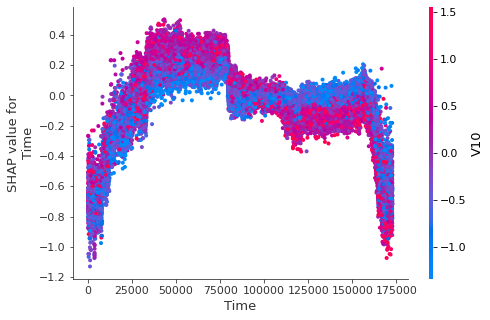

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [33]:
interpret_model(catboost, plot = 'correlation')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x0000024C07D01B88>, plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


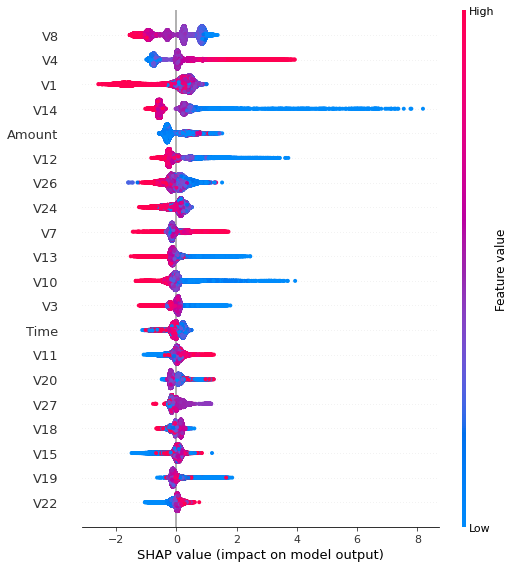

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [37]:
interpret_model(catboost,plot='summary')

In [34]:
catboost_pred = predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9996,0.9847,0.7864,0.9759,0.871,0.8708,0.8759


In [38]:
catboost_final = finalize_model(catboost)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=<catboost.core.CatBoostClassifier object at 0x0000024C07D01B88>, ensemble=False, method=None, fold=10, round=4, cross_validation=True, verbose=False, system=False)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Importing libraries
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:CatBoost Classifier Imported succesfully
INFO:logs:Checking ensemble method
INFO:logs:Initializing Fold 1
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 2
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 3
INFO:logs:Fitting Model
INFO:logs:Evaluating Metrics
INFO:logs:Compiling Metrics
INFO:logs:Initializing Fold 4
INFO:logs:Fitting Model

In [39]:
save_model(catboost_final,'catboost_final')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=<catboost.core.CatBoostClassifier object at 0x0000024C17430D88>, model_name=catboost_final, model_only=False, verbose=True)
INFO:logs:Adding model into prep_pipe
INFO:logs:catboost_final.pkl saved in current working directory
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Leve...
                ('P_trans

Transformation Pipeline and Model Succesfully Saved
